# Project 2- Lending Club Loan Data Analysis

## Description

Create a model that predicts whether or not a loan will be default using the historical data.

## Problem Statement:  

For companies like Lending Club correctly predicting whether or not a loan will be a default is very important. In this project, using the historical data from 2007 to 2015, you have to build a deep learning model to predict the chance of default for future loans. As you will see later this dataset is highly imbalanced and includes a lot of features that make this problem more challenging

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# import data set
lldata=pd.read_csv(r'C:\Users\Aaqui\Desktop\Data Science\Deep Learning\Projects\Project 2- Lending loan data analysis\1585898503_datasets\loan_data.csv')

### A. EDA

In [3]:
lldata.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [4]:
lldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [5]:
lldata.shape

(9578, 14)

In [6]:
lldata.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [7]:
lldata[lldata.duplicated()]

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid


In [8]:
lldata.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

Clearly there is no Null and Diplicate values

In [9]:
# List the columns for different datatypes:
print('Integer Type: ')
print(lldata.select_dtypes(np.int64).columns)
print('\n')
print('Float Type: ')
print(lldata.select_dtypes(np.float64).columns)
print('\n')
print('Object Type: ')
print(lldata.select_dtypes(np.object).columns)


Integer Type: 
Index(['credit.policy', 'fico', 'revol.bal', 'inq.last.6mths', 'delinq.2yrs',
       'pub.rec', 'not.fully.paid'],
      dtype='object')


Float Type: 
Index(['int.rate', 'installment', 'log.annual.inc', 'dti', 'days.with.cr.line',
       'revol.util'],
      dtype='object')


Object Type: 
Index(['purpose'], dtype='object')


In [10]:
lldata.skew()

credit.policy        -1.539621
int.rate              0.164420
installment           0.912522
log.annual.inc        0.028668
dti                   0.023941
fico                  0.471260
days.with.cr.line     1.155748
revol.bal            11.161058
revol.util            0.059985
inq.last.6mths        3.584151
delinq.2yrs           6.061793
pub.rec               5.126434
not.fully.paid        1.854592
dtype: float64

In [11]:
lldata.describe().T

,count,mean,std,min,25%,50%,75%,max
credit.policy,9578.0,0.804970,0.396245,0.000000,1.000000,1.000000,1.000000,1.000000e+00
int.rate,9578.0,0.122640,0.026847,0.060000,0.103900,0.122100,0.140700,2.164000e-01
installment,9578.0,319.089413,207.071301,15.670000,163.770000,268.950000,432.762500,9.401400e+02
log.annual.inc,9578.0,10.932117,0.614813,7.547502,10.558414,10.928884,11.291293,1.452835e+01
dti,9578.0,12.606679,6.883970,0.000000,7.212500,12.665000,17.950000,2.996000e+01
fico,9578.0,710.846314,37.970537,612.000000,682.000000,707.000000,737.000000,8.270000e+02
days.with.cr.line,9578.0,4560.767197,2496.930377,178.958333,2820.000000,4139.958333,5730.000000,1.763996e+04
revol.bal,9578.0,16913.963876,33756.189557,0.000000,3187.000000,8596.000000,18249.500000,1.207359e+06
revol.util,9578.0,46.799236,29.014417,0.000000,22.600000,46.300000,70.900000,1.190000e+02
inq.last.6mths,9578.0,1.577469,2.200245,0.000000,0.000000,1.000000,2.000000,3.300000e+01


### 1. Feature Transformation

Transform categorical values into numerical values (discrete) 

In [12]:
print('Object Type: ')
print(lldata.select_dtypes(np.object).columns)

Object Type: 
Index(['purpose'], dtype='object')


#### The only object column is purpose, so converting it into numerical column

In [13]:
lldata.purpose.value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

In [14]:
cleanup_nums = {"purpose": {"debt_consolidation": 0, 'all_other':1, "credit_card": 1, 'home_improvement':3, 'small_business':4, 'major_purchase': 5, 'educational':6 }}

In [15]:
lldata=lldata.replace(cleanup_nums)

In [16]:
lldata.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [17]:
lldata.purpose.value_counts()

0    3957
1    3593
3     629
4     619
5     437
6     343
Name: purpose, dtype: int64

In [18]:
lldata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   int64  
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(8)
memory usage: 1.0 MB


## 2.  Exploratory data analysis of different factors of the dataset. 

Text(0.5, 0, 'FICO')

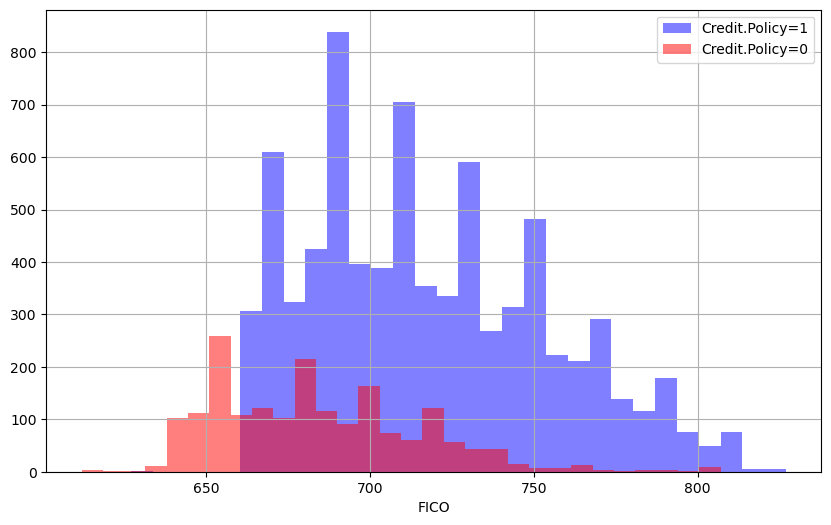

In [19]:
plt.figure(figsize=(10,6))
lldata[lldata['credit.policy']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit.Policy=1')
lldata[lldata['credit.policy']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

Text(0.5, 0, 'FICO')

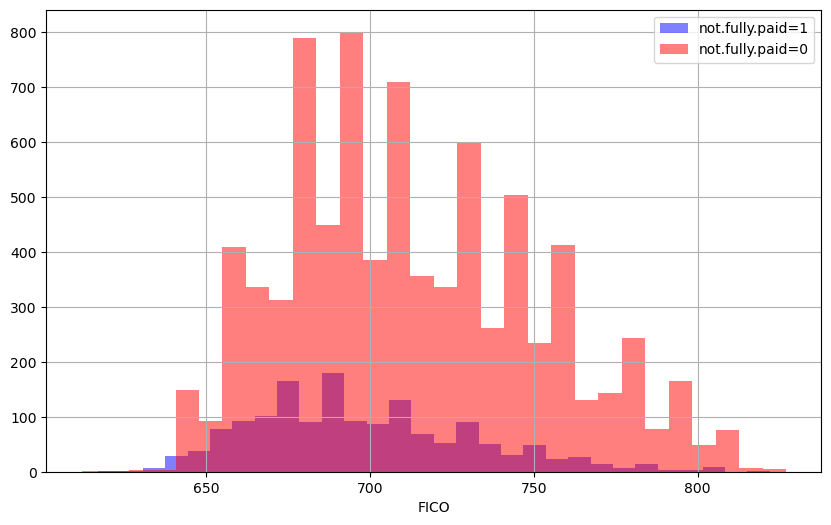

In [20]:
plt.figure(figsize=(10,6))
lldata[lldata['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='blue',bins=30,label='not.fully.paid=1')
lldata[lldata['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='red',bins=30,label='not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

<AxesSubplot:xlabel='purpose', ylabel='count'>

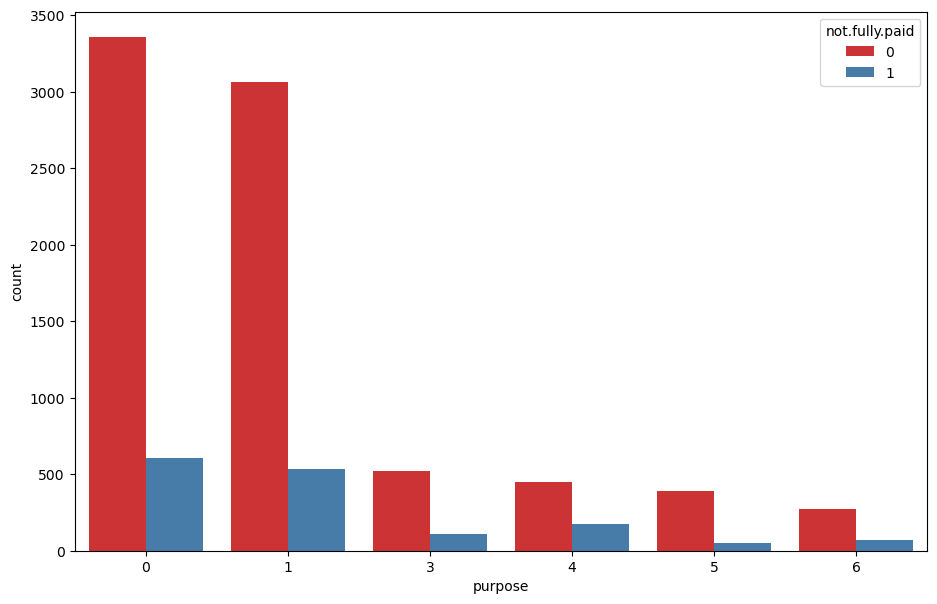

In [21]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=lldata,palette='Set1')

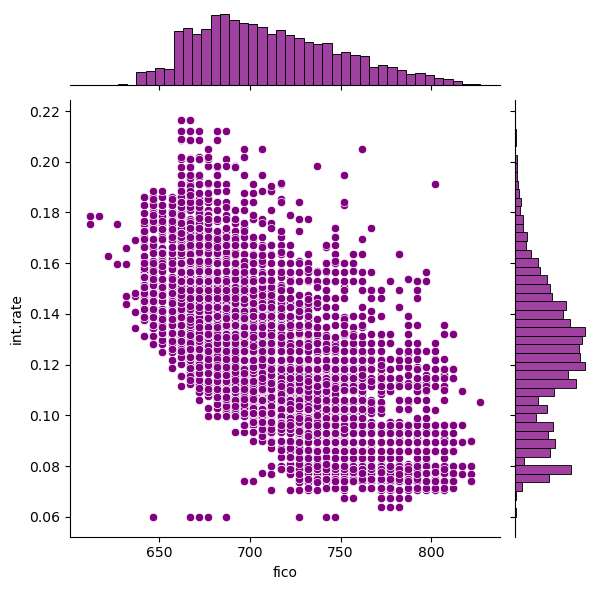

In [22]:
sns.jointplot(x='fico',y='int.rate',data=lldata,color='purple')

<Figure size 1100x700 with 0 Axes>

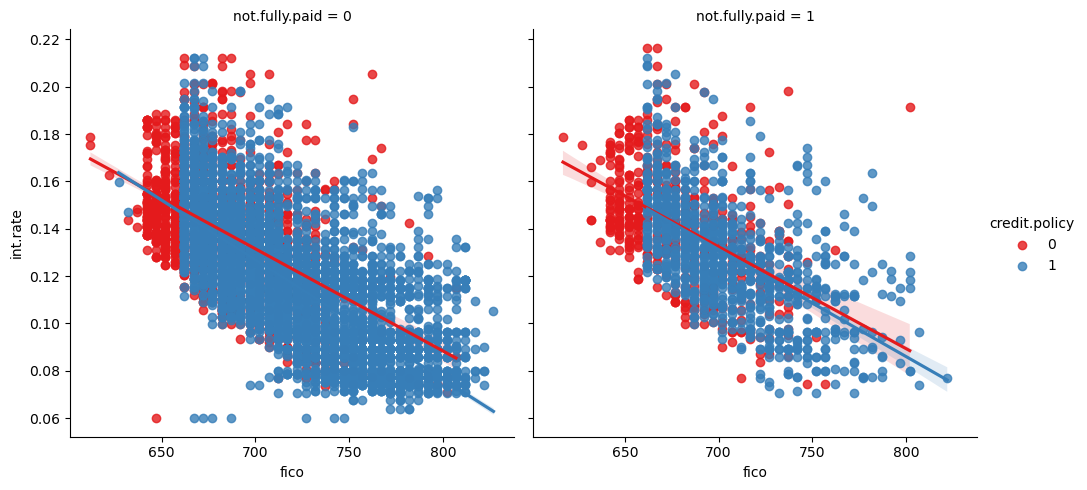

In [23]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=lldata,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

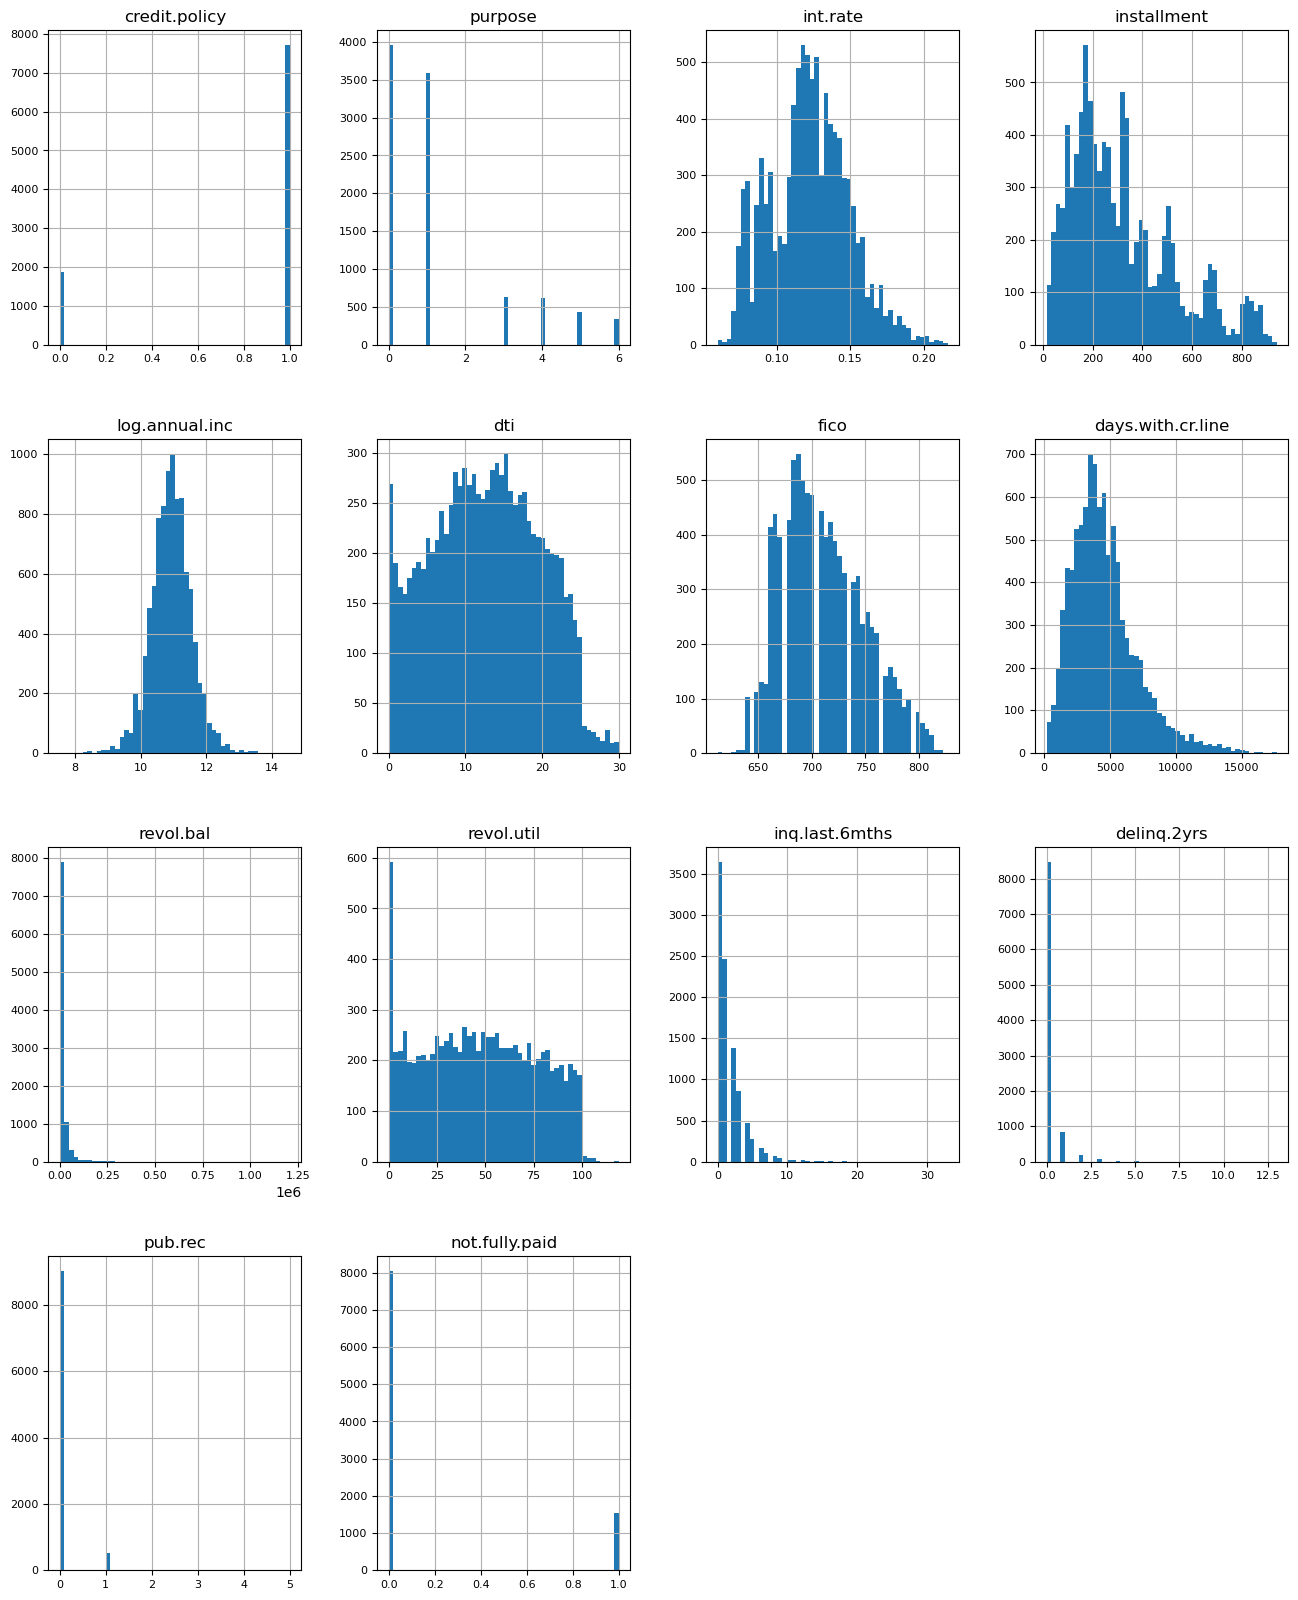

In [24]:
lldata.hist(figsize=(16,20), bins=50, xlabelsize=8, ylabelsize=8);

## 3. Additional Feature Engineering

You will check the correlation between features and will drop those features which have a strong correlation

This will help reduce the number of features and will leave you with the most relevant features 

In [25]:
lldata.corr()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
credit.policy,1.000000,-0.010980,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
purpose,-0.010980,1.000000,-0.029971,-0.068752,0.000527,-0.168856,0.128194,0.004350,-0.014515,-0.206223,0.057417,-0.004686,-0.022302,0.042228
int.rate,-0.294089,-0.029971,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
installment,0.058770,-0.068752,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
log.annual.inc,0.034906,0.000527,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,-0.168856,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,0.128194,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
days.with.cr.line,0.099026,0.004350,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
revol.bal,-0.187518,-0.014515,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
revol.util,-0.104095,-0.206223,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088


<AxesSubplot:>

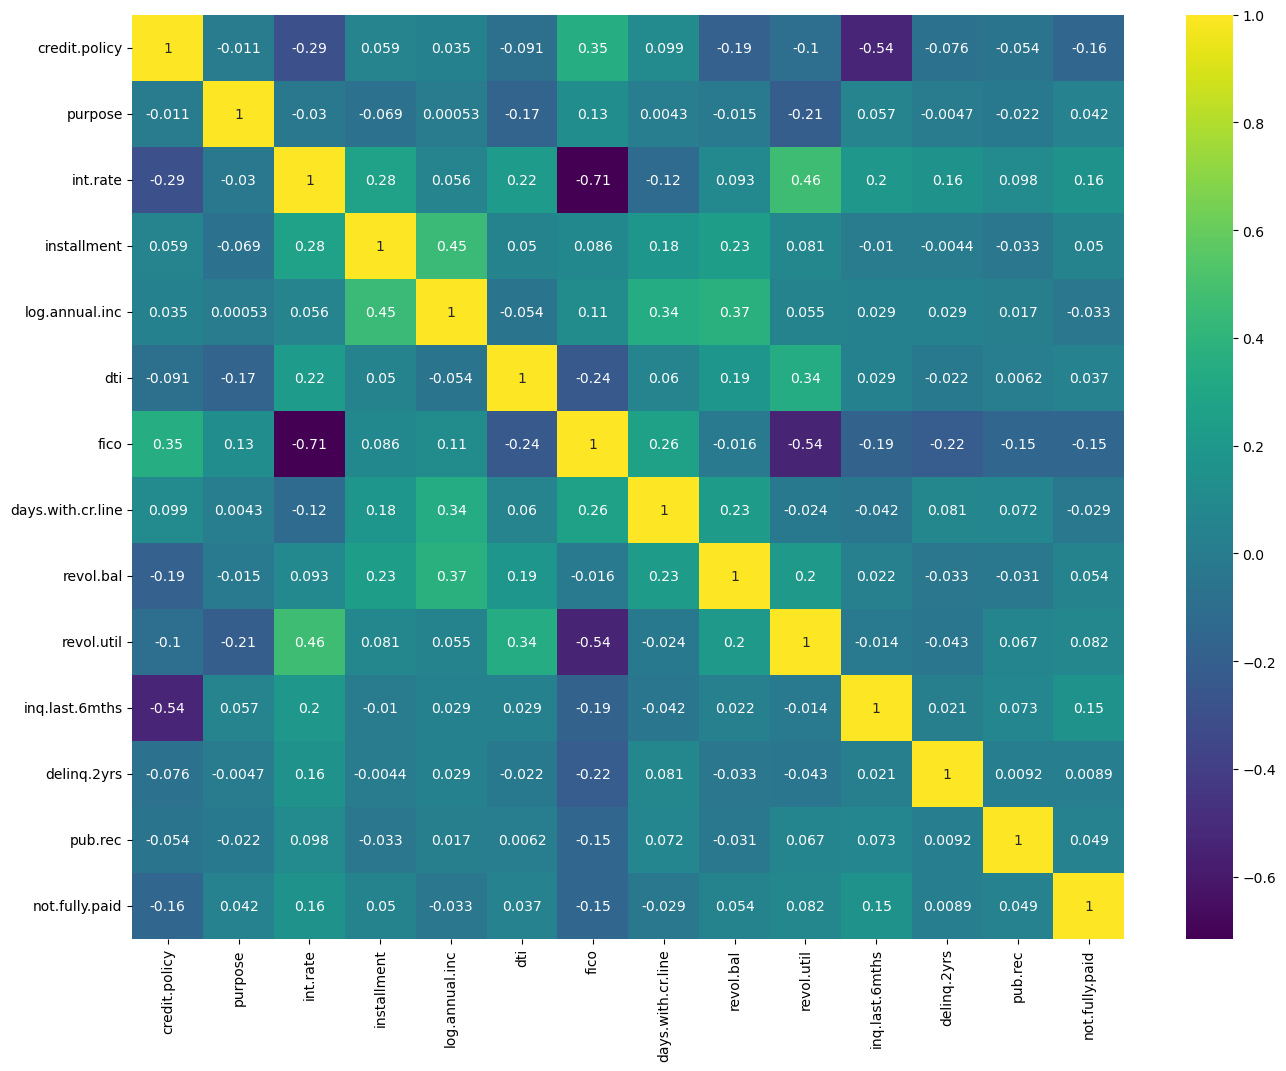

In [27]:
lldata.corr()
plt.figure(
        figsize=[16,12]
)
sns.heatmap(
        data=lldata.corr(), 
        cmap='viridis', 
        annot=True, 
        fmt='.2g'
)

### 4.  Modeling

After applying EDA and feature engineering, you are now ready to build the predictive models

In this part, you will create a deep learning model using Keras with Tensorflow backend 

In [28]:
lldata['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

In [29]:
# Select only numerical features and dropping class features

X=lldata.drop(['purpose','not.fully.paid'], axis =1)
y = lldata[['not.fully.paid']]

<AxesSubplot:>

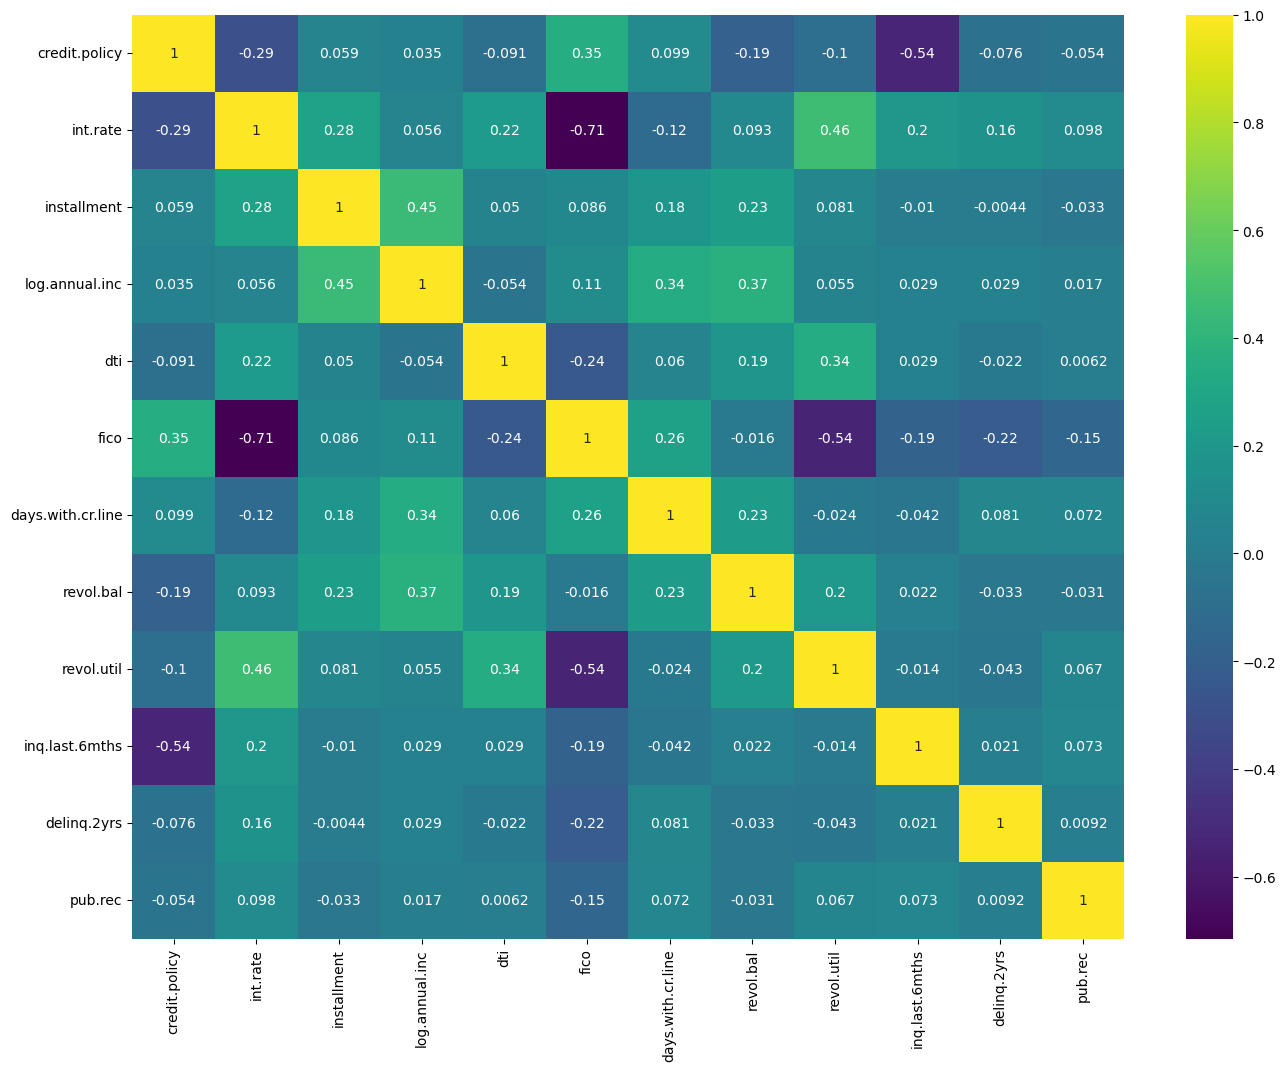

In [30]:
X.corr()
plt.figure(
        figsize=[16,12]
)
sns.heatmap(
        data=X.corr(), 
        cmap='viridis', 
        annot=True, 
        fmt='.2g'
)

In [31]:
y

,not.fully.paid
0,0
1,0
2,0
3,0
4,0
...,...
9573,1
9574,1
9575,1
9576,1


In [32]:
X

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9573,0,0.1461,344.76,12.180755,10.39,672,10474.000000,215372,82.1,2,0,0
9574,0,0.1253,257.70,11.141862,0.21,722,4380.000000,184,1.1,5,0,0
9575,0,0.1071,97.81,10.596635,13.09,687,3450.041667,10036,82.9,8,0,0
9576,0,0.1600,351.58,10.819778,19.18,692,1800.000000,0,3.2,5,0,0


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 100)

In [34]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [35]:
# ANN model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, BatchNormalization,Input
from tensorflow.keras.metrics import Precision, Recall
from livelossplot import PlotLossesKerasTF

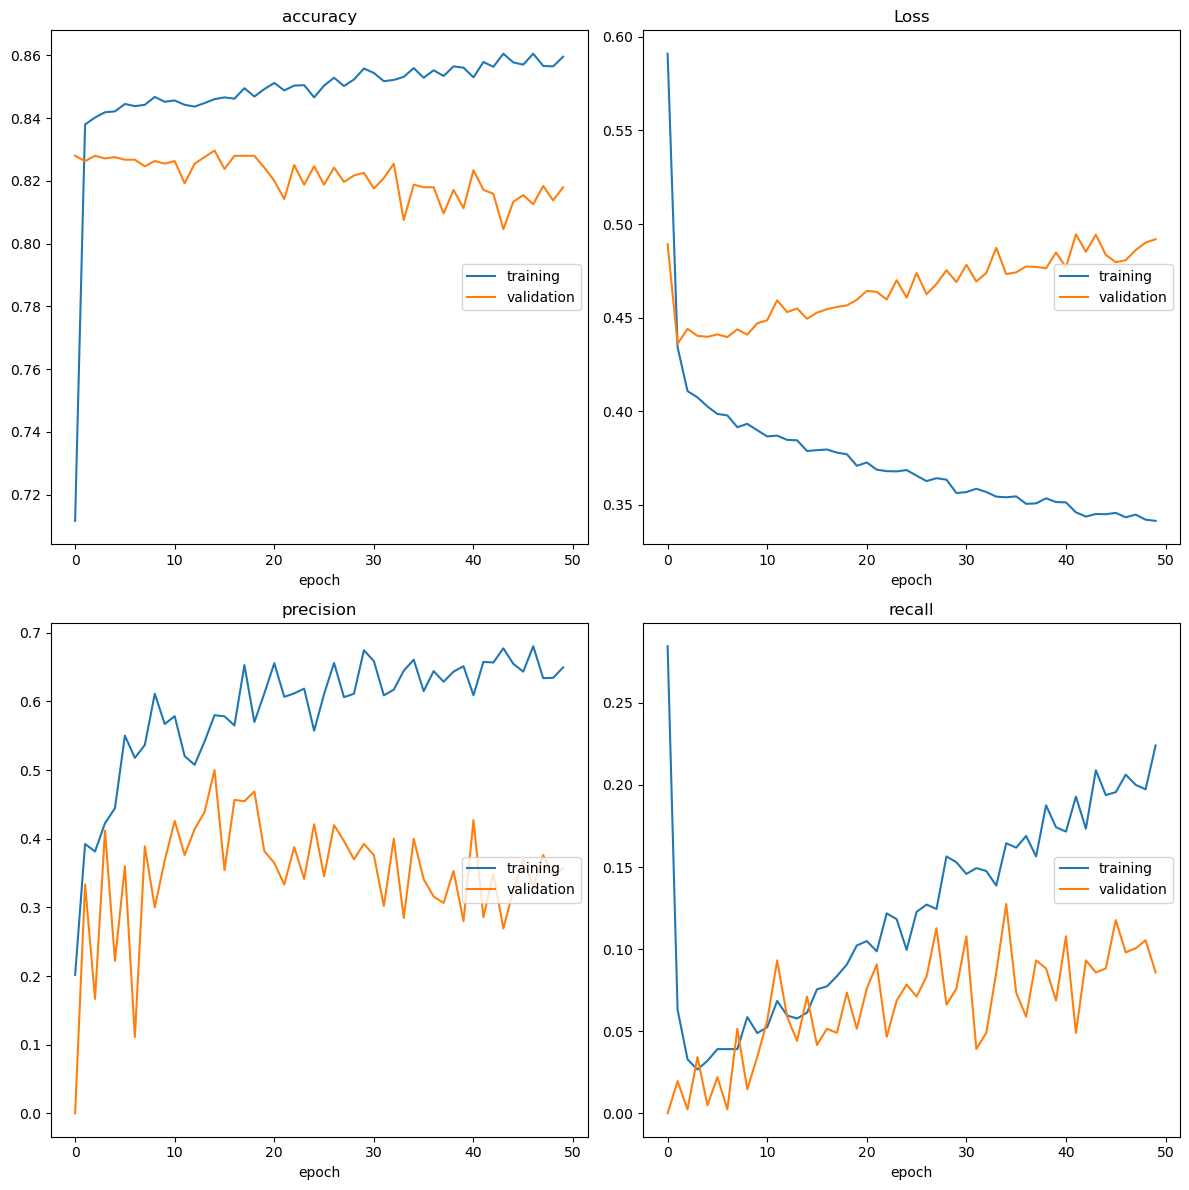

accuracy
	training         	 (min:    0.712, max:    0.861, cur:    0.860)
	validation       	 (min:    0.805, max:    0.830, cur:    0.818)
Loss
	training         	 (min:    0.341, max:    0.591, cur:    0.341)
	validation       	 (min:    0.436, max:    0.495, cur:    0.492)
precision
	training         	 (min:    0.202, max:    0.680, cur:    0.649)
	validation       	 (min:    0.000, max:    0.500, cur:    0.357)
recall
	training         	 (min:    0.027, max:    0.284, cur:    0.224)
	validation       	 (min:    0.000, max:    0.127, cur:    0.086)
113/113 [==============================] - 2s 18ms/step - loss: 0.3414 - accuracy: 0.8595 - precision: 0.6495 - recall: 0.2240 - val_loss: 0.4919 - val_accuracy: 0.8180 - val_precision: 0.3571 - val_recall: 0.0858


In [36]:
model=Sequential()

model.add(Input(shape=(12,)))

model.add(Dense(20,activation='relu'))
model.add(BatchNormalization())

model.add(Dense(40,activation='relu'))
model.add(BatchNormalization())

model.add(Dense(60,activation='relu'))
model.add(BatchNormalization())

model.add(Dense(1,activation='sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy',Precision(),Recall()])

model.fit(X_train,y_train,epochs=50, batch_size=64,validation_data=(X_test,y_test),callbacks=[PlotLossesKerasTF()])

In [37]:
score=model.evaluate(X_test,y_test)
print('Test loss:', score[0]*100)
print('Test accuracy:', score[1]*100)

75/75 [==============================] - 0s 3ms/step - loss: 0.4919 - accuracy: 0.8180 - precision: 0.3571 - recall: 0.0858
Test loss: 49.19228553771973
Test accuracy: 81.79540634155273


In [38]:
t=model.predict(X_test)
t

75/75 [==============================] - 0s 3ms/step


array([[0.17826271],
       [0.14972255],
       [0.40965378],
       ...,
       [0.04323749],
       [0.05965158],
       [0.19373561]], dtype=float32)

In [39]:
print(type(y_test))

<class 'pandas.core.frame.DataFrame'>


In [40]:
t1 = []
for i in range(len(t)):
    if t[i] >= 0.5:
        t1.append(1)
    else:
        t1.append(0)

In [41]:
new_pred = pd.Series(t1)  
print(new_pred)

0       0
1       0
2       0
3       0
4       0
       ..
2390    0
2391    0
2392    0
2393    0
2394    0
Length: 2395, dtype: int64


In [42]:
y_test

,not.fully.paid
838,0
5231,1
3197,0
3077,0
4827,0
...,...
1474,0
8471,0
7550,0
6918,0


In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test,new_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      1987
           1       0.36      0.09      0.14       408

    accuracy                           0.82      2395
   macro avg       0.60      0.53      0.52      2395
weighted avg       0.76      0.82      0.77      2395



In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,new_pred)

array([[1924,   63],
       [ 373,   35]], dtype=int64)

In [45]:
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, new_pred)
print('roc_auc_score is',auc_score1)

roc_auc_score is 0.5270391120716027


In [46]:
conf = confusion_matrix(y_test,new_pred)

tp,fn,fp,tn = confusion_matrix(y_test,new_pred).ravel()
specificity = tn / (tn+fp)
sensitivity= tp / (tp+fn)
print('TP,FP,FN,TN',tp,fn,fp,tn)
print('sensitivity =', sensitivity)
print('specificity =', specificity)

TP,FP,FN,TN 1924 63 373 35
sensitivity = 0.9682939104177152
specificity = 0.0857843137254902


In [47]:
def draw_cm( actual, predicted ):
    cm = confusion_matrix( actual, predicted)
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = [1,0] , yticklabels = [1,0] )
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

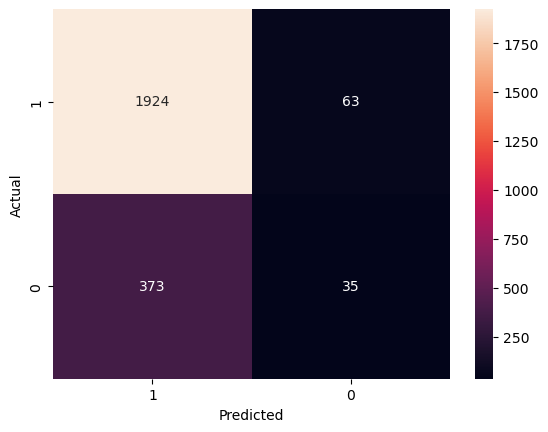

In [48]:
draw_cm(y_test,new_pred);

In [49]:
lldata['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

### We are having data imbalance problem

##  SMOTE

In [50]:
from imblearn.over_sampling import SMOTE
smk = SMOTE()
x_train_smote,y_train_smote=smk.fit_resample(X,y)

In [51]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_train_smote)))

Original dataset shape Counter({'not.fully.paid': 1})
Resampled dataset shape Counter({'not.fully.paid': 1})


In [52]:
print(x_train_smote.shape)
print(y_train_smote.shape)

(16090, 12)
(16090, 1)


In [53]:
# Split the data set into training and testing
x_train, x_test, y_train, y_test = train_test_split(x_train_smote,y_train_smote, test_size=0.25, random_state=100)

In [54]:
scaler = StandardScaler()
x_train_std = scaler.fit_transform(x_train)
x_test_std=scaler.fit_transform(x_test)

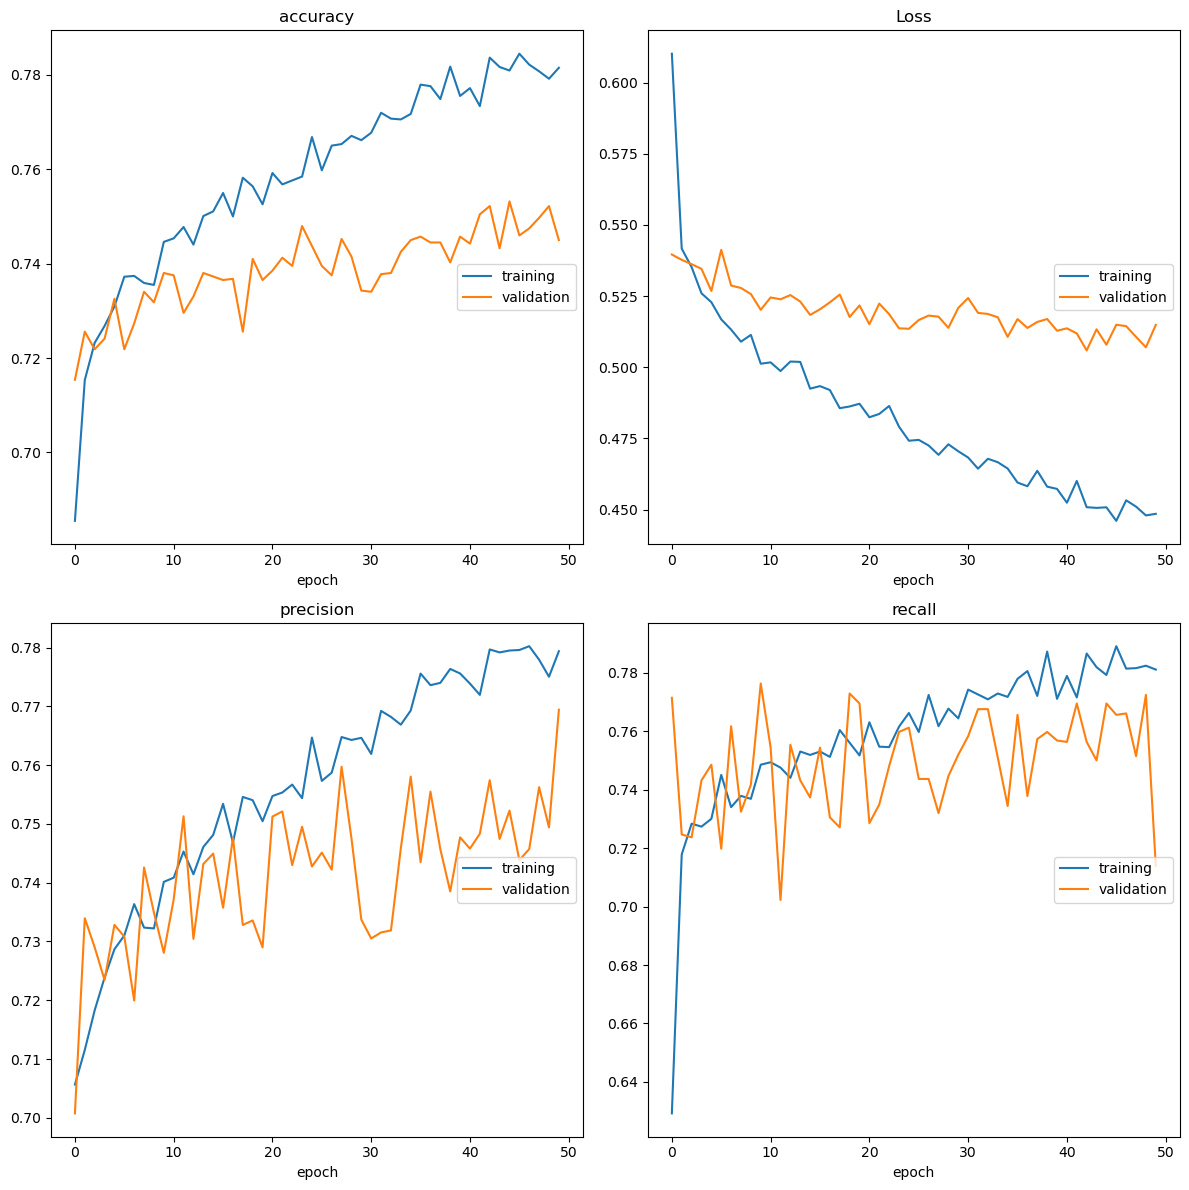

accuracy
	training         	 (min:    0.686, max:    0.784, cur:    0.781)
	validation       	 (min:    0.715, max:    0.753, cur:    0.745)
Loss
	training         	 (min:    0.446, max:    0.610, cur:    0.449)
	validation       	 (min:    0.506, max:    0.541, cur:    0.515)
precision
	training         	 (min:    0.706, max:    0.780, cur:    0.779)
	validation       	 (min:    0.701, max:    0.769, cur:    0.769)
recall
	training         	 (min:    0.629, max:    0.789, cur:    0.781)
	validation       	 (min:    0.702, max:    0.776, cur:    0.714)
189/189 [==============================] - 2s 12ms/step - loss: 0.4485 - accuracy: 0.7815 - precision: 0.7794 - recall: 0.7811 - val_loss: 0.5149 - val_accuracy: 0.7450 - val_precision: 0.7694 - val_recall: 0.7139


In [55]:
model.fit(x_train_std,y_train,epochs=50, batch_size=64,validation_data=(x_test_std,y_test),
          callbacks=[PlotLossesKerasTF()])


In [56]:
score=model.evaluate(x_test_std,y_test)
print('Test loss:', score[0]*100)
print('Test accuracy:', score[1]*100)

126/126 [==============================] - 0s 3ms/step - loss: 0.5149 - accuracy: 0.7450 - precision: 0.7694 - recall: 0.7139
Test loss: 51.48709416389465
Test accuracy: 74.4966447353363


# Predicted the model with 75% accuracy.